In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np

import os, cv2
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [4]:
dir_name = "dataset/faces/"
y = []
x = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    # print(person_name)
    dir_path = dir_name + person_name + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = dir_path + image_name
        
        # Read the input image
        img = cv2.imread(image_path)
        
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # resize image to 300*300 dimension
        resized_image = cv2.resize(gray, (h, w))
        
        # convert matrix to vector
        v = resized_image.flatten()
        
        # increase the number of samples
        n_samples += 1
        
        # Adding the categorical label
        y.append(person_id)
        
        # adding the person name
        target_names.append(person_name)
        
        # Append the vectorized image to the X list
        x.append(v)
    
    # Increase the person id by 1
    person_id += 1

# Transform list to numpy array
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]

print(y.shape, x.shape, target_names.shape)
print("Number of samples:", n_samples)

n_classes = target_names.shape[0]

print("Total dataset size: ")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size: 
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


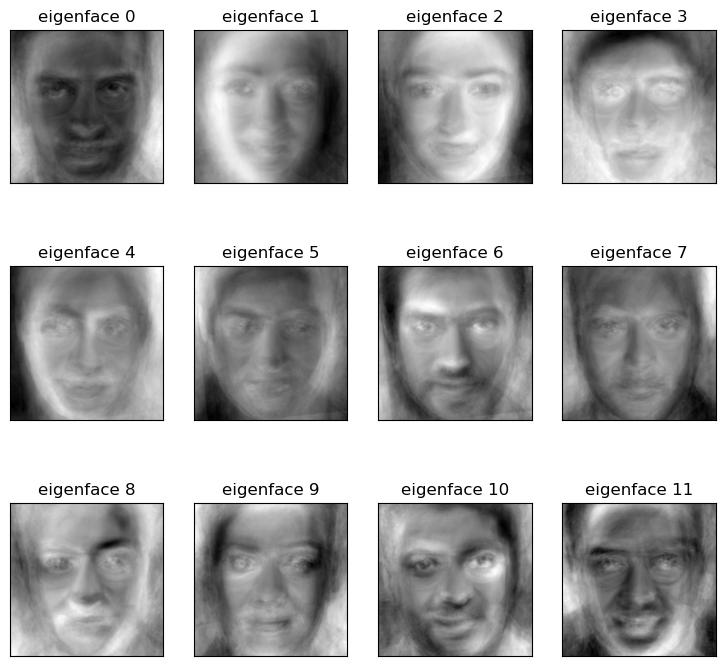

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Projection done..............


In [6]:
# Ensure X is defined correctly
X = x  # Use the dataset created earlier
h, w = 300, 300  # Ensure these are defined correctly based on your data preprocessing

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Compute a PCA (eigenfaces) on the face dataset
n_components = 150
print(
    "Extracting the top %d eigenfaces from %d faces"
    % (n_components, X_train.shape[0])
)

# Applying PCA
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significant eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)

# Compute Fisherfaces
lda = LinearDiscriminantAnalysis()

# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)  # Fixed to use X_test_pca instead of X_train_pca

print("Projection done..............")


In [7]:
# Training with Multi-layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)

print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.86138909
Iteration 2, loss = 2.81064366
Iteration 3, loss = 2.76232963
Iteration 4, loss = 2.71516490
Iteration 5, loss = 2.66970766
Iteration 6, loss = 2.62649892
Iteration 7, loss = 2.58307914
Iteration 8, loss = 2.54091431
Iteration 9, loss = 2.50168334
Iteration 10, loss = 2.46194744
Iteration 11, loss = 2.42423716
Iteration 12, loss = 2.38923151
Iteration 13, loss = 2.35462188
Iteration 14, loss = 2.32225150
Iteration 15, loss = 2.28838987
Iteration 16, loss = 2.25761549
Iteration 17, loss = 2.22718718
Iteration 18, loss = 2.19759622
Iteration 19, loss = 2.16951287
Iteration 20, loss = 2.14132437
Iteration 21, loss = 2.11476756
Iteration 22, loss = 2.08815662
Iteration 23, loss = 2.06328220
Iteration 24, loss = 2.03816042
Iteration 25, loss = 2.01271893
Iteration 26, loss = 1.98951737
Iteration 27, loss = 1.96496575
Iteration 28, loss = 1.94220775
Iteration 29, loss = 1.91889479
Iteration 30, loss = 1.89647385
Iteration 31, loss = 1.87402290
Iteration 32, los

Iteration 318, loss = 0.07434954
Iteration 319, loss = 0.07397689
Iteration 320, loss = 0.07357369
Iteration 321, loss = 0.07318369
Iteration 322, loss = 0.07275013
Iteration 323, loss = 0.07235789
Iteration 324, loss = 0.07199509
Iteration 325, loss = 0.07157556
Iteration 326, loss = 0.07118332
Iteration 327, loss = 0.07080815
Iteration 328, loss = 0.07041602
Iteration 329, loss = 0.07003805
Iteration 330, loss = 0.06966187
Iteration 331, loss = 0.06928121
Iteration 332, loss = 0.06890285
Iteration 333, loss = 0.06853392
Iteration 334, loss = 0.06820061
Iteration 335, loss = 0.06781246
Iteration 336, loss = 0.06743537
Iteration 337, loss = 0.06708176
Iteration 338, loss = 0.06672522
Iteration 339, loss = 0.06636050
Iteration 340, loss = 0.06602740
Iteration 341, loss = 0.06566524
Iteration 342, loss = 0.06532632
Iteration 343, loss = 0.06496281
Iteration 344, loss = 0.06462907
Iteration 345, loss = 0.06427903
Iteration 346, loss = 0.06397584
Iteration 347, loss = 0.06364829
Iteration 

Accuracy: 71.68141592920354


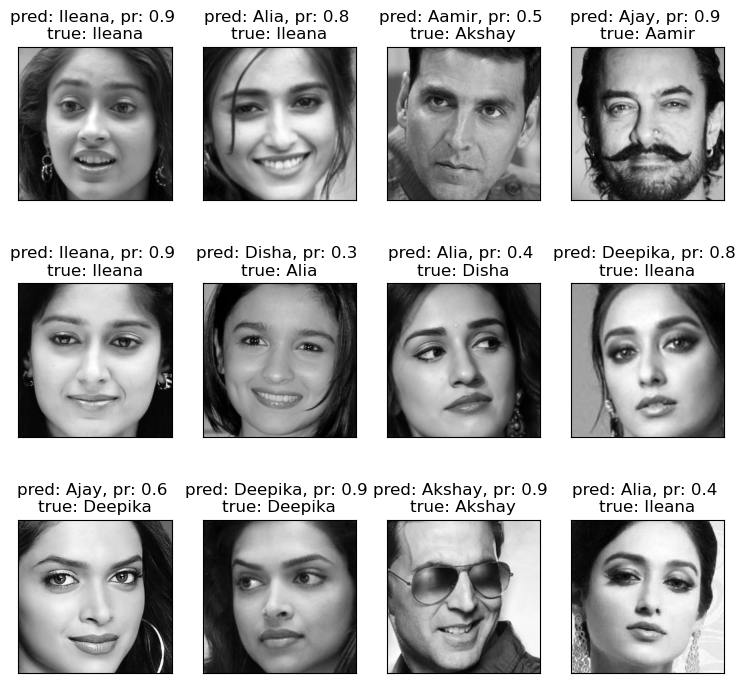

In [9]:
y_pred = []
y_prob = []

for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    # print(prob, np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    
    # print(class_index)

    # Find the Label of the matched face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    # true name = target_names[y_test[i]].rsplit(', 1)[1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    
    # result = 'prediction: %s \ntrue: %s' % (pred_name, true_name)
    prediction_titles.append(result)
    
    if true_name == pred_name:
        true_positive += 1

print("Accuracy:", true_positive * 100 / y_pred.shape[0])

# Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()